In [89]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [90]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

Reading & understanding the Data

In [91]:
bikeDf = pd.read_csv('day.csv')

In [92]:
bikeDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [93]:
bikeDf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [94]:
bikeDf.shape

(730, 16)

In [95]:
bikeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [96]:
# We can observe that there is no null value in the data set

Cleaning the Data

# From the data following columns are being dropped :-

1. instant : row instance identifier.
2. dteday : date features like mnth and year and weekday already present
3. casual and registered variables : they sum up to  the target variable cnt 

In [97]:
bikeDf.drop(['instant'], axis = 1, inplace = True)
bikeDf.drop(['dteday'], axis = 1, inplace = True)
bikeDf.drop(['casual'], axis = 1, inplace = True)
bikeDf.drop(['registered'], axis = 1, inplace = True)

In [98]:
bikeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [99]:
# Columns like season, mnth, weekday and weathersit are integers & should be converted to non-numerical categories.

In [100]:
bikeDf.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikeDf.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bikeDf.mnth = bikeDf.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikeDf.weekday = bikeDf.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [101]:
bikeDf.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [102]:
#Since temp & atemp are highly correalted , dropping atemp
bikeDf.drop(['atemp'], axis = 1, inplace = True)

In [103]:
bikeDf.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [104]:
# For the variables 'temp', 'hum', 'windspeed' , from the above distribution its very clear there in no outlier 

EDA

Visualising the Data to Find the Correlation between the Numerical Variable

In [105]:
# creating Pairplot between numeric variables

<Figure size 1500x3000 with 0 Axes>

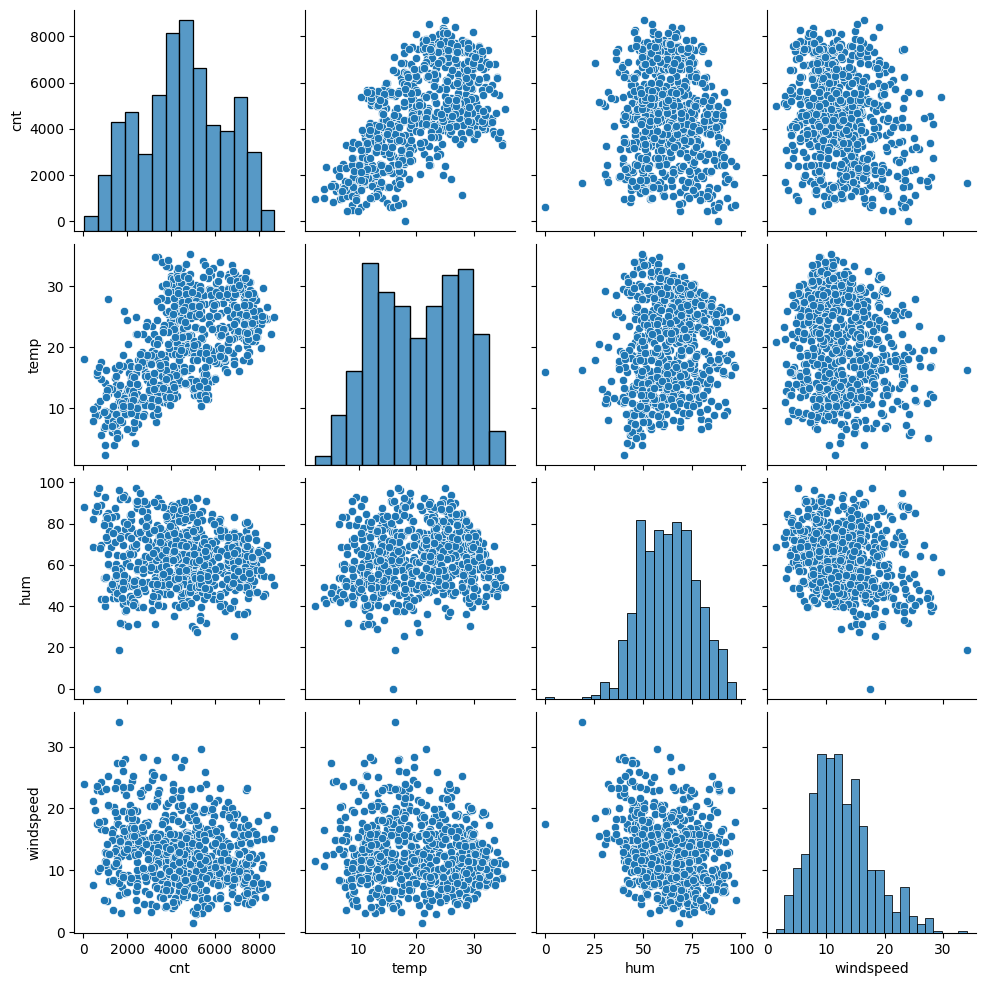

In [106]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeDf,vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

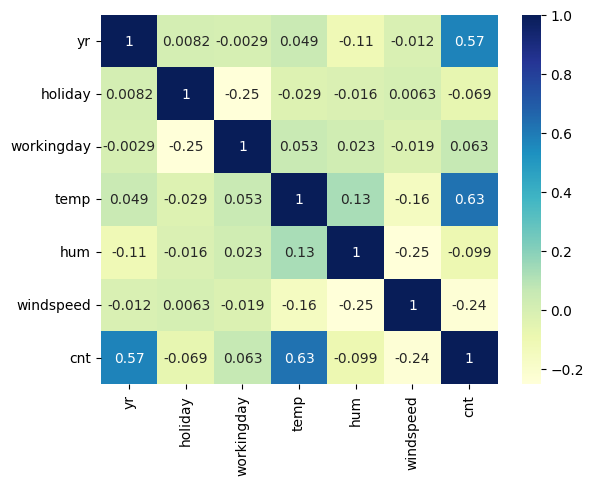

In [107]:
cor=bikeDf.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

Observations:-
1.   Demand for bikes is positively correlated to temp.
2.   We can see that cnt is linearly increasing with temp indicating linear relation.
3. cnt decreasing with increase in humidity.
4. Windspeed is values are more scattered around.
Although we can see cnt decreasing with increase in windspeed.



Visualising the Data to Find the Correlation between the Categorical Variable 


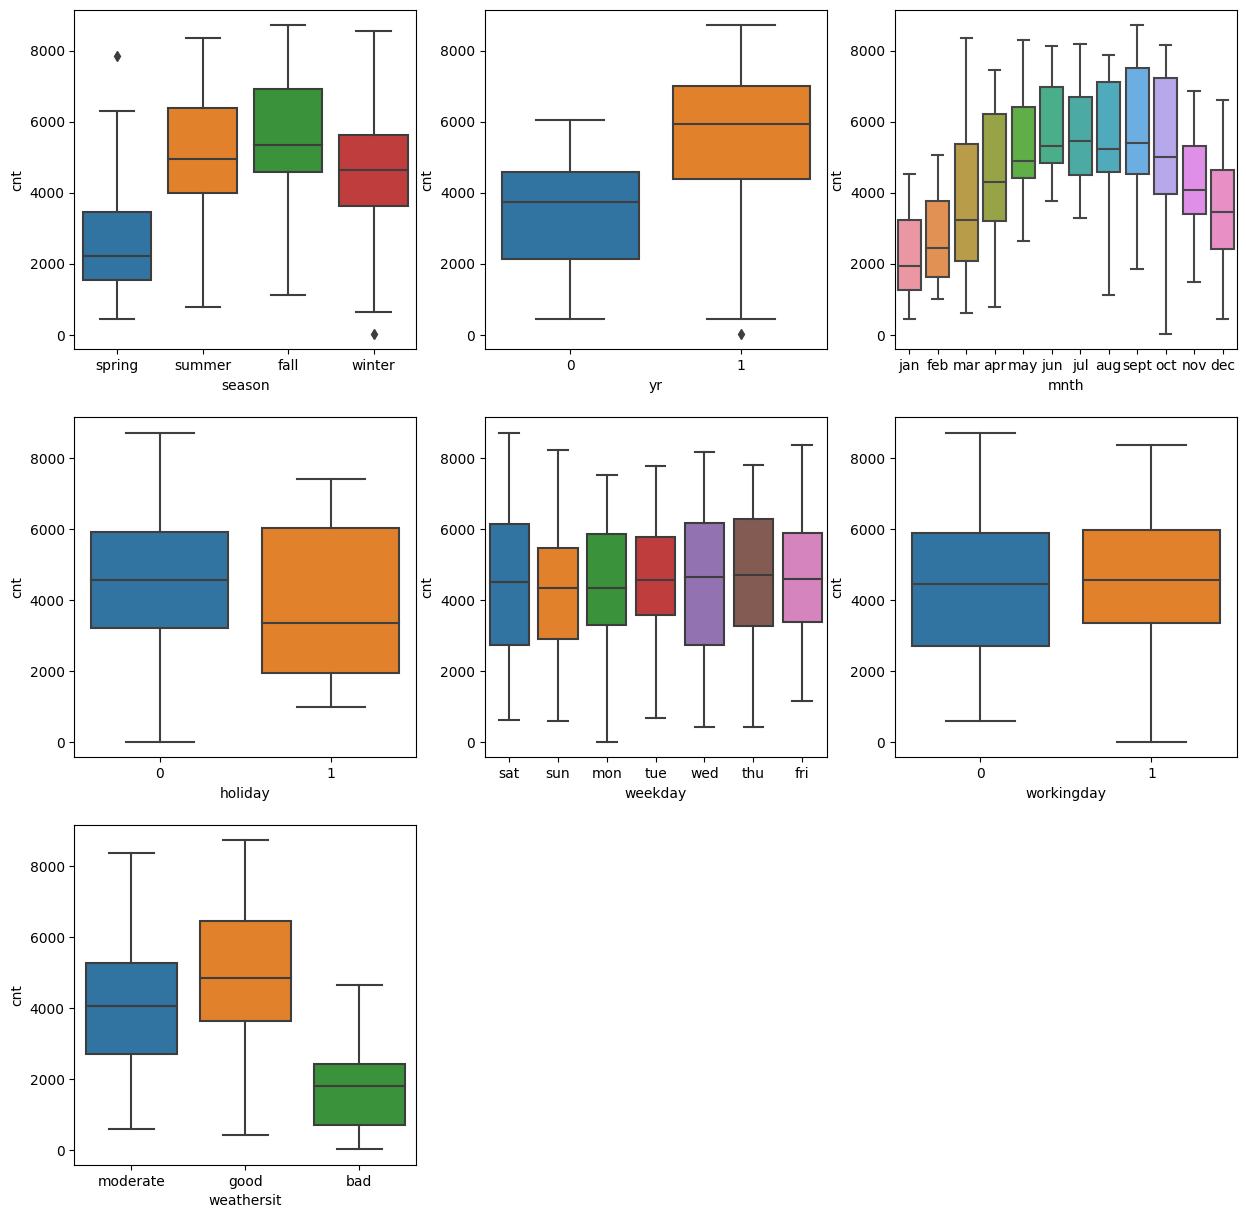

In [108]:
# Boxplot/Subplot  for categorical variables 
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeDf, x=i[1], y='cnt')
plt.show()

Following are the observations:-
1. fall has highest demand for rental bikes
2. Demand has grown year on year
3. Demand is continuously growing till September & then decreases
4. Demand has decreased on Holidays.
5. Uniform trend of Weekday on demand.No specific pattern observed
6. The clear weather has highest demand


DataPrep for Linear Regression Modeling 

In [109]:
#Creating Dummy Variables for categorical values
bikeDf = pd.get_dummies(data=bikeDf,columns=["season","mnth","weekday"],drop_first=True)
bikeDf = pd.get_dummies(data=bikeDf,columns=["weathersit"])


In [110]:
bikeDf.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [111]:
bikeDf.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [112]:
bikeDf.shape

(730, 30)

Split data into Train & Test


In [113]:
#y to contain target variable
y=bikeDf.pop('cnt')

#X :- All independent variables
X=bikeDf

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# Checking shape and size for train and test data set
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


Rescaling of Numeric Variables

In [114]:

# Scale the following variables
num_vars = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [115]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [116]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Building the model using RFE 

In [118]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [119]:
#Feature Count set to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 12),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [83]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [84]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [120]:
#Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

Build Model

Model 1 - All variables selected by RFE

In [122]:
cols = X_train.columns[rfe.support_]

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.03e-186
Time:                        15:05:37   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1871.6691    

For Elimination we woul follow the following 

High P , High VIF Drop
High P , Low VIF drop 2nd
Low P , High VIF drop 3rd 


In [123]:
# Dropping weathersit_good as it has very high VIF
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.03e-186
Time:                        15:14:33   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3281.6898    

In [124]:
# Dropping hum as it has very high VIF
cols = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.75e-184
Time:                        15:15:28   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2507.3675    

Inference:-

 VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is .834. 
 Difference between R-squared and Adjusted R-squared values for this model is veryless
 we will finalize the above Model  

In [125]:
#Build a model with all columns
cols = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
lr1 = LinearRegression()
lr1.fit(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

-4218954652800400.0 [ 1.94696113e+03 -4.29665037e+13 -4.29665037e+13  3.73665460e+03
 -1.35236934e+03 -1.00460477e+03 -1.22399888e+03  1.03215866e+02
  6.36730622e+02 -1.19247342e+02 -2.87192574e+02  1.64791166e+02
  3.19917874e+01 -3.77597671e+02 -2.98999995e+01  4.83031620e+02
  2.48601082e+02 -3.98037109e+02  3.33625000e+02  6.05215820e+02
 -1.56816406e+02 -4.29665037e+13 -4.29665037e+13 -5.88452148e+01
 -2.39193359e+02 -9.07929688e+01  4.26192116e+15  4.26192116e+15
  4.26192116e+15]


Model Evaluation

In [128]:
#REsidual Analysis
y_train_pred = lr1.predict(X_train[cols])


Text(0.5, 0, 'Errors')

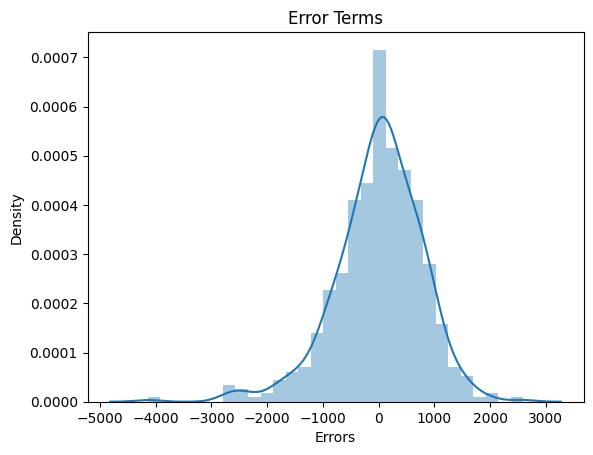

In [130]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

Errors are normally distribured here with mean 0

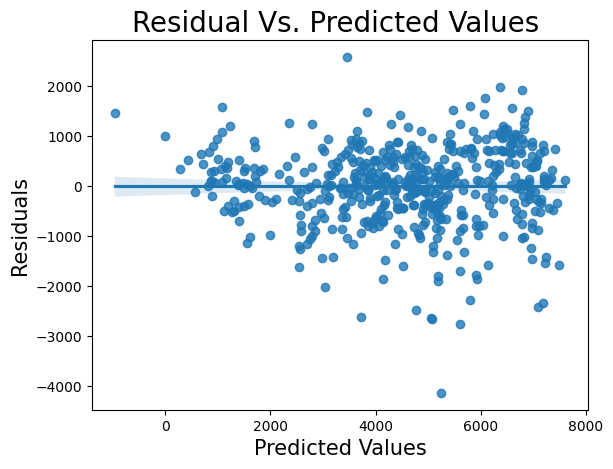

In [131]:
sns.regplot(x=y_train_pred, y=y_train-y_train_pred)
plt.title('Residual Vs. Predicted Values ', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

No relation between Residual & Predicted Value

In [132]:
#R-squared Value
r2_score(y_train,y_train_pred)

0.8344143924705585

Predict Values for Test Data

In [134]:
#Scale variables in X_test
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])
#Predict the values for test data
y_test_pred = lr1.predict(X_test[cols])
# R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8223402574390548

Homoscedacity
R2 value for predictions on test data (0.822) is same as R2 value of train data(0.833).  we can see our model is performing good  on test data

Text(0, 0.5, 'y_test_pred')

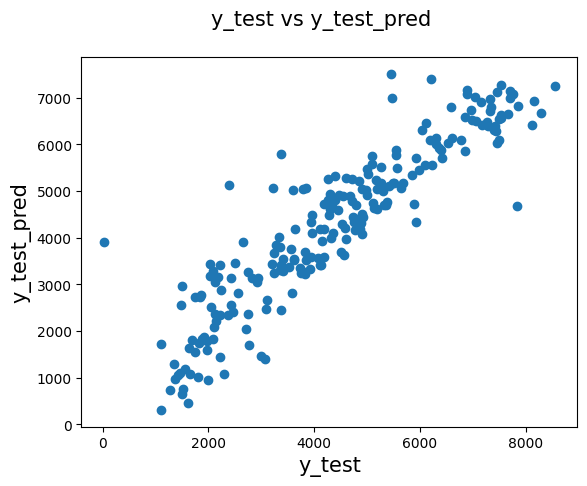

In [136]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)               
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_test_pred', fontsize = 15)

Conclusion 

Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
There would be less bookings during Light Snow or Rain.
Year on Year growth is there once situation is normal